In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader
from math import sqrt

file_daqiwendu = '../dataset/daqiwendu.nc'
file_jueduishidu = '../dataset/jueduishidu.nc'
file_haiyangbiaomian = '../dataset/sst.nc' 
file_xiangduishidu = '../dataset/xiangduishidu.nc'
file_weishigaodu = '../dataset/weishigaodu.nc'

dataset_daqiwendu = nc.Dataset(file_daqiwendu)
dataset_jueduishidu = nc.Dataset(file_jueduishidu)
dataset_haiyangbiaomian = nc.Dataset(file_haiyangbiaomian)
dataset_xiangduishidu = nc.Dataset(file_xiangduishidu)
dataset_weishigaodu = nc.Dataset(file_weishigaodu)

DaQiWenDu = dataset_daqiwendu['air']
DaQiWenDu_level_200 = DaQiWenDu[:,9:10,:,:]
DaQiWenDu_level_1000 = DaQiWenDu[:,:1,:,:]
HaiYangBiaoMian = dataset_haiyangbiaomian['sst']



/home/lk/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/lk/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/lk/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [156]:
dataset_xiangduishidu

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 18:11:03 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/pressure/rhum.mon.mean.nc ./pressure/rhum.mon.mean.nc
Mon Jul  5 22:22:51 1999: ncrcat rhum.mon.mean.nc /Datasets/ncep.reanalysis.derived/pressure/rhum.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/rhum.mon.mean.nc
created by Cathy Smith 12/5/95
(netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean rhum from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    dimensions(sizes): level(8), lat(73), lon(144), time(906)
    variables(dimensions): float32 level(level

In [2]:
# 绝对湿度To 的phase1 level 300 1980-1999
JueDuiShiDu_To_phase1 = dataset_jueduishidu['shum'][384:624,7:]
# 绝对湿度Ts 的phase2 level 1000 1980-1999
JueDuiShiDu_Ts_phase1 = dataset_jueduishidu['shum'][384:624,:1]
# 绝对湿度To 的phase2 level 300 2000-2022
JueDuiShiDu_To_phase2 = dataset_jueduishidu['shum'][624:900,7:]
# 绝对湿度Ts 的phase2 level 1000 2000-2022
JueDuiShiDu_Ts_phase2 = dataset_jueduishidu['shum'][624:900,:1]

# 相对湿度To 的phase1 level 300 1980-1999
XiangDuiShiDu_To_phase1 = dataset_xiangduishidu['rhum'][384:624,7:]
# 相对湿度Ts 的phase1 level 1000 1980-1999
XiangDuiShiDu_Ts_phase1 = dataset_xiangduishidu['rhum'][384:624,:1]
# 相对湿度To 的phase2 level 300 2000-2022
XiangDuiShiDu_To_phase2 = dataset_xiangduishidu['rhum'][624:900,7:]
# 相对湿度Ts 的phase2 level 1000 2000-2022
XiangDuiShiDu_Ts_phase2 = dataset_xiangduishidu['rhum'][624:900,:1]

# 位势高度To 的phase1 level 200 1980-1999
WeiShiGaoDu_To_phase1 = dataset_weishigaodu['hgt'][384:624,9:10]
# 位势高度Ts 的phase1 level 1000 1980-1999
WeiShiGaoDu_Ts_phase1 = dataset_weishigaodu['hgt'][384:624,:1]
# 位势高度To 的phase2 level 200 2000-2022
WeiShiGaoDu_To_phase2 = dataset_weishigaodu['hgt'][624:900,9:10]
# 位势高度Ts 的phase2 level 1000 2000-2022
WeiShiGaoDu_Ts_phase2 = dataset_weishigaodu['hgt'][624:900,:1]

# 大气温度To 的phase1 level 200 1980-1999
DaQiWenDu_To_phase1 = dataset_daqiwendu['air'][384:624,9:10]
# 大气温度Ts 的phase1 level 1000 1980-1999
DaQiWenDu_Ts_phase1 = dataset_daqiwendu['air'][384:624,:1]
# 大气温度To 的phase2 level 200 2000-2022
DaQiWenDu_To_phase2 = dataset_daqiwendu['air'][624:900,9:10]
# 大气温度Ts 的phase2 level 1000 2000-2022
DaQiWenDu_Ts_phase2 = dataset_daqiwendu['air'][624:900,:1]



In [3]:

def year_mean(start, end, df_):
    '''
    计算每一个阶段的年平均数，start 开始年月的的索引，end 结束年月的索引
    df_ 需要计算的表格
    '''
    zero_lat_lon = np.zeros((73,144), dtype=float, order='C') 
    num_year = int((end - start)/12)
    zero_lat_lon_year = np.zeros([num_year,73,144], dtype=float, order='C')
    df_ = np.squeeze(df_)
    for month in range(start,end,12):
        tmp = zero_lat_lon
    #     month_mean = zero_lat_lon
        # 对每月的air进行求和
        for i in range(13):
            tmp += df_[i:i+1][0]
        # 计算月平均
        month_mean = tmp / 12
        # 设置DaQiWenDu_year的索引
        tmp_index = int((month-start)/12)
        zero_lat_lon_year[tmp_index] = month_mean
    return zero_lat_lon_year

JueDuiShiDu_To_phase1_mean = year_mean(384, 624, JueDuiShiDu_To_phase1)
XiangDuiShiDu_To_phase1_mean = year_mean(384, 624, XiangDuiShiDu_To_phase1)
WeiShiGaoDu_To_phase1_mean = year_mean(384, 624, WeiShiGaoDu_To_phase1)
DaQiWenDu_To_phase1_mean = year_mean(384, 624, DaQiWenDu_To_phase1)

JueDuiShiDu_Ts_phase1_mean = year_mean(384, 624, JueDuiShiDu_Ts_phase1)
XiangDuiShiDu_Ts_phase1_mean = year_mean(384, 624, XiangDuiShiDu_Ts_phase1)
WeiShiGaoDu_Ts_phase1_mean = year_mean(384, 624, WeiShiGaoDu_Ts_phase1)
DaQiWenDu_Ts_phase1_mean = year_mean(384, 624, DaQiWenDu_Ts_phase1)





In [44]:
# h = 1.013*DaQiWenDu + JueDuiShiDu/XiangDuiShiDu*44 + 9.8*WeiShiGaoDu
# 计算phase1 ho值 1980-1999 200 level
J_div_X = np.zeros((73,144), dtype=float, order='C')
J_div_X_phase1_lev200 = np.zeros((20,73,144), dtype=float, order='C')
for i in range(20):
    tmp2d_j = JueDuiShiDu_To_phase1_mean[i:i+1][0]
    tmp2d_x = XiangDuiShiDu_To_phase1_mean[i:i+1][0]
    for x in range(73):
        for y in range(144):
            tmp_div = tmp2d_j[x][y] / tmp2d_x[x][y]
            J_div_X[x][y] = tmp_div
    J_div_X_phase1_lev200[i] = J_div_X
    
ho_phase1_lev200 = 1.005 * DaQiWenDu_To_phase1_mean + J_div_X_phase1_lev200 * 1002 + 9.8 * WeiShiGaoDu_To_phase1_mean

# 计算phase1 hs值 1980-1999 1000 level
J_div_X = np.zeros((73,144), dtype=float, order='C')
J_div_X_phase1_lev1000 = np.zeros((20,73,144), dtype=float, order='C')
for i in range(20):
    tmp2d_j = JueDuiShiDu_Ts_phase1_mean[i:i+1][0]
    tmp2d_x = XiangDuiShiDu_Ts_phase1_mean[i:i+1][0]
    for x in range(73):
        for y in range(144):
            tmp_div = tmp2d_j[x][y] / tmp2d_x[x][y]
            J_div_X[x][y] = tmp_div
    J_div_X_phase1_lev1000[i] = J_div_X
    
hs_phase1_lev1000 = 1.005 * DaQiWenDu_Ts_phase1_mean + J_div_X_phase1_lev1000 * 1002 + 9.8 * WeiShiGaoDu_Ts_phase1_mean

ts_div_to = np.zeros((73,144), dtype=float, order='C')
ts_div_to_phase1 = np.zeros((20,73,144), dtype=float, order='C')
for i in range(20):
    tmp2d_ts = DaQiWenDu_Ts_phase1_mean[i:i+1][0]
    tmp2d_to = DaQiWenDu_To_phase1_mean[i:i+1][0]
    for x in range(73):
        for y in range(144):
            tmp_div = tmp2d_ts[x][y] / tmp2d_to[x][y]
            ts_div_to[x][y] = tmp_div
    ts_div_to_phase1[i] = ts_div_to
Vmax_phase1 = 0.9 *(ts_div_to_phase1 - 1)*(hs_phase1_lev1000-ho_phase1_lev200) 

In [11]:
# 计算第二阶段的Vmax
JueDuiShiDu_To_phase2_mean = year_mean(624,900, JueDuiShiDu_To_phase2)
XiangDuiShiDu_To_phase2_mean = year_mean(624,900, XiangDuiShiDu_To_phase2)
WeiShiGaoDu_To_phase2_mean = year_mean(624,900, WeiShiGaoDu_To_phase2)
DaQiWenDu_To_phase2_mean = year_mean(624,900, DaQiWenDu_To_phase2)

JueDuiShiDu_Ts_phase2_mean = year_mean(624,900, JueDuiShiDu_Ts_phase2)
XiangDuiShiDu_Ts_phase2_mean = year_mean(624,900, XiangDuiShiDu_Ts_phase2)
WeiShiGaoDu_Ts_phase2_mean = year_mean(624,900, WeiShiGaoDu_Ts_phase2)
DaQiWenDu_Ts_phase2_mean = year_mean(624,900, DaQiWenDu_Ts_phase2)

In [45]:
# h = 1.013*DaQiWenDu + JueDuiShiDu/XiangDuiShiDu*44 + 9.8*WeiShiGaoDu
# 计算phase2 ho值 2000-2022 200 level
J_div_X = np.zeros((73,144), dtype=float, order='C')
J_div_X_phase2_lev200 = np.zeros((23,73,144), dtype=float, order='C')
for i in range(23):
    tmp2d_j = JueDuiShiDu_To_phase2_mean[i:i+1][0]
    tmp2d_x = XiangDuiShiDu_To_phase2_mean[i:i+1][0]
    for x in range(73):
        for y in range(144):
            tmp_div = tmp2d_j[x][y] / tmp2d_x[x][y]
            J_div_X[x][y] = tmp_div
    J_div_X_phase2_lev200[i] = J_div_X
    
ho_phase2_lev200 = 1.005 * DaQiWenDu_To_phase2_mean + J_div_X_phase2_lev200 * 1002 + 9.8 * WeiShiGaoDu_To_phase2_mean

# 计算phase2 hs值 2000-2022 1000 level
J_div_X = np.zeros((73,144), dtype=float, order='C')
J_div_X_phase2_lev1000 = np.zeros((23,73,144), dtype=float, order='C')
for i in range(23):
    tmp2d_j = JueDuiShiDu_Ts_phase2_mean[i:i+1][0]
    tmp2d_x = XiangDuiShiDu_Ts_phase2_mean[i:i+1][0]
    for x in range(73):
        for y in range(144):
            tmp_div = tmp2d_j[x][y] / tmp2d_x[x][y]
            J_div_X[x][y] = tmp_div
    J_div_X_phase2_lev1000[i] = J_div_X
    
hs_phase2_lev1000 = 1.005 * DaQiWenDu_Ts_phase2_mean + J_div_X_phase2_lev1000 * 1002 + 9.8 * WeiShiGaoDu_Ts_phase2_mean

ts_div_to = np.zeros((73,144), dtype=float, order='C')
ts_div_to_phase2 = np.zeros((23,73,144), dtype=float, order='C')
for i in range(23):
    tmp2d_ts = DaQiWenDu_Ts_phase2_mean[i:i+1][0]
    tmp2d_to = DaQiWenDu_To_phase2_mean[i:i+1][0]
    for x in range(73):
        for y in range(144):
            tmp_div = tmp2d_ts[x][y] / tmp2d_to[x][y]
            ts_div_to[x][y] = tmp_div
    ts_div_to_phase2[i] = ts_div_to

Vmax_phase2 = 0.9 *(ts_div_to_phase2 - 1)*(hs_phase2_lev1000-ho_phase2_lev200)

In [49]:
print(Vmax_phase1,Vmax_phase2)

[[[  70060.34155561   70060.34155561   70060.34155561 ...
     70060.34155561   70060.34155561   70060.34155561]
  [  70348.50937814   70437.48889933   70523.11650707 ...
     70078.53341781   70169.94711818   70259.47933597]
  [  70994.70092373   71103.50369206   71207.38253942 ...
     70623.66753899   70754.06661487   70875.61976123]
  ...
  [  59844.2229203    59464.44216145   59111.78232649 ...
     61061.10331466   60645.87440339   60237.80545091]
  [  56614.86295925   56421.80890888   56225.78648718 ...
     57240.99651379   57030.09698252   56815.90260019]
  [  57903.45967329   57903.45967329   57903.45967329 ...
     57903.45967329   57903.45967329   57903.45967329]]

 [[ 140120.45936989  140120.45936989  140120.45936989 ...
    140120.45936989  140120.45936989  140120.45936989]
  [ 140696.85317422  140874.81562911  141046.06901931 ...
    140156.89488098  140339.72393036  140518.79049458]
  [ 141989.24294169  142206.84502067  142414.59865853 ...
    141247.17317028  141507.97

In [52]:
tmp_phase1 = np.zeros((73,144), dtype=float, order='C') 
for i in range(20):
    tmp_phase1 += Vmax_phase1[i]
Vmax_mean_phase1 =  tmp_phase1/20 

tmp_phase2 = np.zeros((73,144), dtype=float, order='C') 
for i in range(23):
    tmp_phase2 += Vmax_phase2[i]

Vmax_mean_phase2 =  tmp_phase2/23

diff =Vmax_mean_phase2  - Vmax_mean_phase1 
print(diff.max(),diff.min())

305995.1448174163 -11150.661470843246


In [43]:
longitude = dataset_daqiwendu['lon'][:]
latitude = dataset_daqiwendu['lat'][:]


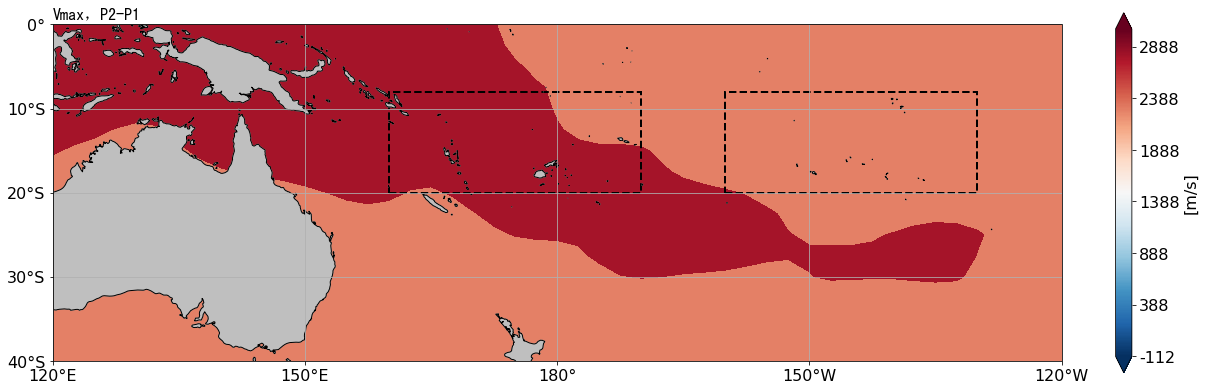

In [53]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

from matplotlib import rcParams
from matplotlib import patches
import matplotlib

matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

# 设置字体
config = {
    "font.family": 'Times New Roman',
    "font.size": 16,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

MAX = 305995 * 0.01
MIN = -11150 * 0.01
INTER =50000 * 0.01

# 设置经纬度
# lon = longitude[:].data
lon = np.append(longitude[:].data, [360.0])
lat = latitude[:].data

# 调整经纬度 向东偏移180
# lon_pacific = lon[:] + 180
# a, b = np.hsplit(diff, [179])
# diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
diff_2d = diff* 0.01
new_diff=[]
for i in range(diff_2d.shape[0]):
    tmp = np.append(diff_2d[i], diff_2d[i][0])
    new_diff.append(tmp.tolist())
new_diff = np.array(new_diff)

fig = plt.figure(figsize=(15,5))

proj = ccrs.PlateCarree(central_longitude=180)
# proj = ccrs.PlateCarree()
leftlon, rightlon, lowerlat, upperlat = (120,240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('Vmax，P2-P1',loc='left',
                  fontsize =16, fontproperties='SimHei', 
                  fontweight='bold')

cont = fig_ax1.contourf(lon, lat, new_diff, 
                 levels=np.arange(MIN, MAX, INTER), # 颜色分片
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

black_quarter_b1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_b2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax1.add_patch(black_quarter_b1)
fig_ax1.add_patch(black_quarter_b2)

norm = colors.Normalize(vmin=MIN, vmax=MAX)    #确定colormap的最大最小值

cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-14,15,9))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,
                                       cmap=plt.cm.RdBu_r
#                                        cmap = newcmap
                                      ),label='[m/s]',
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(MIN, MAX, INTER).tolist(), # colorbar分片                                                 
                 extend='both',
                fraction=0.0158) 

# plt.colorbar(cont,fraction=0.012)

# plt.savefig("vmax_20240311_cn.png",dpi=300,bbox_inches='tight')
plt.show()

In [93]:
time = dataset_haiyangbiaomian.variables['time']
sum_month = np.zeros(HaiYangBiaoMian[:1].data.shape, dtype=float, order='C') # 创建空矩阵
num_month = time[:].data.shape[0] # 创建空时间矩阵
#计算1980年1月到1999年12月的月数 时间从1870年开始按月算
num_month_firt = (1999 - 1980 + 1) * 12
#计算2000年1月到2022年12月的月数
num_mon_second = (2022 - 2000 + 1) * 12 + 2

In [95]:
#选取两个阶段的数据 T_o
# 计算大气温度的时间
month_1980to1948 = (1980 - 1948) * 12 
month_1999to1948 = (1999 - 1948) * 12 + 11 # 这个数值要取到1999年12月
# 选取大气温度数据level是200，第一阶段时间1980年1月-1999年12月
# 总共240个月
DaQiWenDu_To_phase1 = DaQiWenDu_level_200[month_1980to1948:month_1999to1948+1]
# 选取大气温度数据level是200，第一阶段时间2000年1月-最后一个月
DaQiWenDu_To_phase2 = DaQiWenDu_level_200[month_1999to1948+1:]


#选取两个阶段的数据 T_s
DaQiWenDu_Ts_phase1 = DaQiWenDu_level_1000[month_1980to1948:month_1999to1948+1]
# 选取大气温度数据level是1000，第一阶段时间2000年1月-最后一个月
DaQiWenDu_Ts_phase2 = DaQiWenDu_level_1000[month_1999to1948+1:]

In [116]:
# To计算phase1的月平均
# 创建空矩阵
DaQiWenDu_zero_to = np.zeros(DaQiWenDu_To_phase1[:1].data.shape, dtype=float, order='C') 
DaQiWenDu_year_to_phase1 = np.zeros(DaQiWenDu_To_phase1[:1999-1980+1].data.shape, dtype=float, order='C') 
for month in range(month_1980to1948,month_1999to1948+1,12):
    tmp = DaQiWenDu_zero_to
    DaQiWenDu_month_mean = DaQiWenDu_zero_to
    # 对每月的air进行求和
    for i in range(13):
        tmp += DaQiWenDu_level_200[month+i:month+i+1]
    # 计算月平均
    DaQiWenDu_month_mean = tmp / 12
    # 设置DaQiWenDu_year的索引
    tmp_index = int((month-month_1980to1948)/12)
    DaQiWenDu_year_to_phase1[tmp_index] = DaQiWenDu_month_mean

# To计算phase2的月平均
DaQiWenDu_zero_to = np.zeros(DaQiWenDu_To_phase2[:1].data.shape, dtype=float, order='C') 
DaQiWenDu_year_to_phase2 = np.zeros(DaQiWenDu_To_phase2[:2024-2000].data.shape, dtype=float, order='C') 
for month in range(month_1999to1948,911,12):
    tmp = DaQiWenDu_zero_to
    DaQiWenDu_month_mean = DaQiWenDu_zero_to
    # 对每月的air进行求和
    for i in range(13):
        tmp += DaQiWenDu_level_200[month+i:month+i+1]
    # 计算月平均
    DaQiWenDu_month_mean = tmp / 12
    # 设置DaQiWenDu_year的索引
    tmp_index = int((month - month_1999to1948)/12)
    DaQiWenDu_year_to_phase2[tmp_index] = DaQiWenDu_month_mean
    

In [ ]:
DaQiWenDu_zero_to = np.zeros(DaQiWenDu_To_phase1[:1].data.shape, dtype=float, order='C') 
DaQiWenDu_year_to_phase1 = np.zeros(DaQiWenDu_To_phase1[:1999-1980+1].data.shape, dtype=float, order='C') 
for month in range(month_1980to1948,month_1999to1948+1,12):
    tmp = DaQiWenDu_zero_to
    DaQiWenDu_month_mean = DaQiWenDu_zero_to
    # 对每月的air进行求和
    for i in range(13):
        tmp += DaQiWenDu_level_200[month+i:month+i+1]
    # 计算月平均
    DaQiWenDu_month_mean = tmp / 12
    # 设置DaQiWenDu_year的索引
    tmp_index = int((month-month_1980to1948)/12)
    DaQiWenDu_year_to_phase1[tmp_index] = DaQiWenDu_month_mean

In [117]:
# Ts计算phase1的月平均 level 1000
# 创建空矩阵
DaQiWenDu_zero_ts = np.zeros(DaQiWenDu_Ts_phase1[:1].data.shape, dtype=float, order='C') 
DaQiWenDu_year_ts_phase1 = np.zeros(DaQiWenDu_Ts_phase1[:1999-1980+1].data.shape, dtype=float, order='C') 
for month in range(month_1980to1948,month_1999to1948+1,12):
    tmp = DaQiWenDu_zero_ts
    DaQiWenDu_month_mean = DaQiWenDu_zero_ts
    # 对每月的air进行求和
    for i in range(13):
        tmp += DaQiWenDu_level_1000[month+i:month+i+1]
    # 计算月平均
    DaQiWenDu_month_mean = tmp / 12
    # 设置DaQiWenDu_year的索引
    tmp_index = int((month-month_1980to1948)/12)
    DaQiWenDu_year_ts_phase1[tmp_index] = DaQiWenDu_month_mean

# Ts计算phase2的月平均
DaQiWenDu_zero_ts = np.zeros(DaQiWenDu_Ts_phase2[:1].data.shape, dtype=float, order='C') 
DaQiWenDu_year_ts_phase2 = np.zeros(DaQiWenDu_Ts_phase2[:2024-2000].data.shape, dtype=float, order='C') 
for month in range(month_1999to1948,911,12):
    tmp = DaQiWenDu_zero_ts
    DaQiWenDu_month_mean = DaQiWenDu_zero_ts
    # 对每月的air进行求和
    for i in range(13):
        tmp += DaQiWenDu_level_1000[month+i:month+i+1]
    # 计算月平均
    DaQiWenDu_month_mean = tmp / 12
    # 设置DaQiWenDu_year的索引
    tmp_index = int((month - month_1999to1948)/12)
    DaQiWenDu_year_ts_phase2[tmp_index] = DaQiWenDu_month_mean

In [118]:
# 第一阶段ts/to
ts_divide_to_phase1 = np.zeros(DaQiWenDu_year_to_phase1[i:i+1][0][0].shape, dtype=float, order='C') 
for i in range(20):
    tmp2d_to = DaQiWenDu_year_to_phase1[i:i+1][0][0]
    tmp2d_ts = DaQiWenDu_year_ts_phase1[i:i+1][0][0]
    for x in range(len(tmp2d)):
        for y in range(len(tmp2d[0])):
            tmp_div = tmp2d_to[x][y] / tmp2d_ts[x][y]
            ts_divide_to_phase1[x][y] = tmp_div
            
ts_divide_to_phase1 = ts_divide_to_phase1-1

# 第二阶段ts/to
ts_divide_to_phase2 = np.zeros(DaQiWenDu_year_to_phase2[i:i+1][0][0].shape, dtype=float, order='C') 
for i in range(24):
    tmp2d_to = DaQiWenDu_year_to_phase2[i:i+1][0][0]
    tmp2d_ts = DaQiWenDu_year_ts_phase2[i:i+1][0][0]
    for x in range(len(tmp2d)):
        for y in range(len(tmp2d[0])):
            tmp_div = tmp2d_to[x][y] / tmp2d_ts[x][y]
            ts_divide_to_phase2[x][y] = tmp_div

ts_divide_to_phase2 = ts_divide_to_phase2 - 1